In [1]:
import torch
torch.manual_seed(0)

In [2]:
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = [2.05,  13.27, 14.5, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

In [3]:
x = torch.tensor(x)
y = torch.tensor(y)

In [4]:
w = torch.rand(1)
b = torch.rand(1)

def model(x, w, b):
    # 0.55 * x - 17.78
    return w * x + b

In [5]:
def loss_fn(ŷ, y):
    squared_diffs = (ŷ - y)**2
    return squared_diffs.mean()

In [6]:
ŷ = model(x, w, b)
print(ŷ)

tensor([18.4846, 28.5090, 29.6504, 41.4116, 28.7075, 25.0352, 17.5913, 11.5866,
        24.7870, 30.7421, 34.7122])


In [7]:
loss = loss_fn(ŷ, y)
print(loss)

tensor(257.0079)


In [8]:
delta = 0.1

In [9]:
dl_dw = (loss_fn(model(x, w + delta, b), y) - loss_fn(model(x, w - delta, b), y)) / (2.0 * delta)

print(dl_dw)

tensor(1636.7188)


In [10]:
learning_rate = 1e-4

In [11]:
print(w)
w = w - learning_rate * dl_dw
print(w)

tensor([0.4963])
tensor([0.3326])


In [12]:
dl_db = (loss_fn(model(x, w, b + delta), y) - loss_fn(model(x, w, b - delta), y)) / (2.0 * delta)

print(b)
b = b - learning_rate * dl_db
print(b)

tensor([0.7682])
tensor([0.7667])


In [13]:
ŷ = model(x, w, b)
print(ŷ)

tensor([12.6400, 19.3582, 20.1232, 28.0054, 19.4912, 17.0301, 12.0414,  8.0171,
        16.8638, 20.8548, 23.5155])


In [14]:
loss = loss_fn(ŷ, y)
print(loss)

tensor(67.8804)


In [15]:
def dl_dŷ(ŷ, y):
    return 2 * (ŷ - y)

In [16]:
def dŷ_dw(x, w, b):
    return x

In [17]:
def dŷ_db(x, w, b):
    return 1.0

In [18]:
def grad_fn(x, y, ŷ, w, b):
    dl_dw = dl_dŷ(ŷ, y) * dŷ_dw(x, w, b)
    dl_db = dl_dŷ(ŷ, y) * dŷ_db(x, w, b)
    return torch.stack([dl_dw.mean(), dl_db.mean()])

In [19]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        ŷ = model(x, w, b)
        loss = loss_fn(ŷ, y)
        grad = grad_fn(x, y, ŷ, w, b)

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 1000, 10000, 100000, 200000, 300000, 400000, 500000}:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            print('    Params:', params)
            print('    Grad:  ', grad)
        if epoch in {4, 12, 101, 1001, 10001}:
            print('...')

        if not torch.isfinite(loss).all():
            break
    return params

In [20]:
params = training_loop(
    n_epochs = 300001, 
    learning_rate = 1e-4, 
    params = torch.rand(2), 
    x = x, 
    y = y)

Epoch 1, Loss 85.588348
    Params: tensor([0.1712, 0.1332])
    Grad:   tensor([-827.5836,  -11.6279])
Epoch 2, Loss 37.236702
    Params: tensor([0.2053, 0.1335])
    Grad:   tensor([-340.7119,   -3.0518])
Epoch 3, Loss 29.042200
    Params: tensor([0.2193, 0.1335])
    Grad:   tensor([-140.2872,    0.4786])
...
Epoch 10, Loss 27.364300
    Params: tensor([0.2292, 0.1316])
    Grad:   tensor([-0.3329,  2.9435])
Epoch 11, Loss 27.363426
    Params: tensor([0.2292, 0.1313])
    Grad:   tensor([-0.1675,  2.9464])
...
Epoch 99, Loss 27.287016
    Params: tensor([0.2296, 0.1053])
    Grad:   tensor([-0.0519,  2.9439])
Epoch 100, Loss 27.286152
    Params: tensor([0.2297, 0.1050])
    Grad:   tensor([-0.0518,  2.9438])
...
Epoch 1000, Loss 26.518120
    Params: tensor([ 0.2343, -0.1578])
    Grad:   tensor([-0.0511,  2.8978])
...
Epoch 10000, Loss 20.033710
    Params: tensor([ 0.2768, -2.5707])
    Grad:   tensor([-0.0436,  2.4753])
...
Epoch 100000, Loss 3.281785
    Params: tensor([  0.

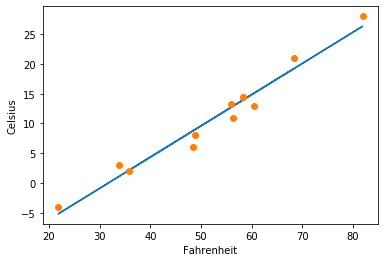

In [21]:
import numpy
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

ŷ = model(x, *params)  # <1>

fig = plt.figure()
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), ŷ.detach().numpy()) # <2>
plt.plot(x.numpy(), y.numpy(), 'o')